# Evaluation des ersten AE Modells

In [1]:
%run -i ./scripts/PythonImports.py

Imports..


In [2]:
%run -i ./scripts/EvalPreperations.py

Set configs..
Read the data..
Shape of normal data: (105216, 17)
Shape of anormal data: (35040, 18)
Shape of drifted data: (35040, 18)
Save label..
Shape of anormal data: (35040, 17)
Shape of drifted data: (35040, 17)
Scale data..
Prepare data for PyTorch..


## Read Model

In [18]:
%run -i ./scripts/ReadAE_LogReg.py

Load trained simple AE..
/Users/torge/Development/master/masterthesis_code/02_Experimente/AnomalyDetection/models/model_bib/20200302_firstAE_model.pt
SimpleAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=17, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=8, bias=True)
    (3): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=17, bias=True)
    (3): Tanh()
  )
)
Load trained LogReg..
LogisticRegression(C=1.0, class_weight={1: 2.0}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


## Bestimmen der Modellqualität (Train- und Test-Loss)

### Trainingsdaten

In [17]:
losses_normal = []
for val in normal_torch_tensor:
    loss = model.calc_reconstruction_error(val)
    losses_normal.append(loss.item())

s_losses_normal = pd.Series(losses_normal)

Text(0.5, 1.0, 'Train Loss')

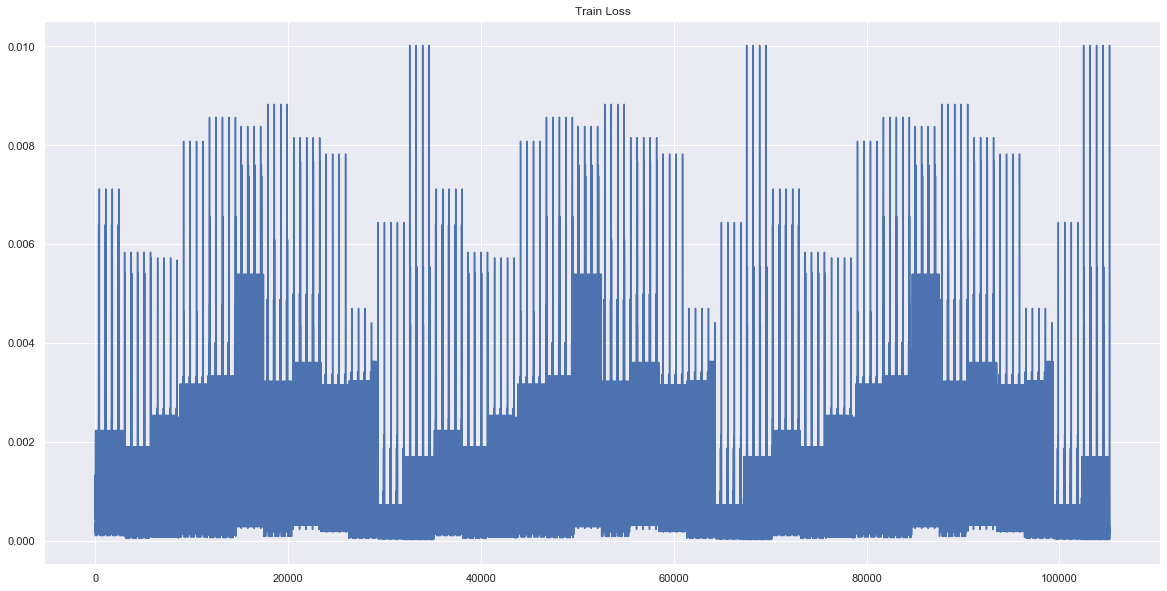

In [18]:
fig = plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(losses_normal)),losses_normal)
plt.title('Train Loss')

### Testdaten

In [19]:
losses_anormal = []
for val in anormal_torch_tensor:
    loss = model.calc_reconstruction_error(val)
    losses_anormal.append(loss.item())
    
s_losses_anormal = pd.Series(losses_anormal)

Text(0.5, 1.0, 'Test Loss mit Anomalien')

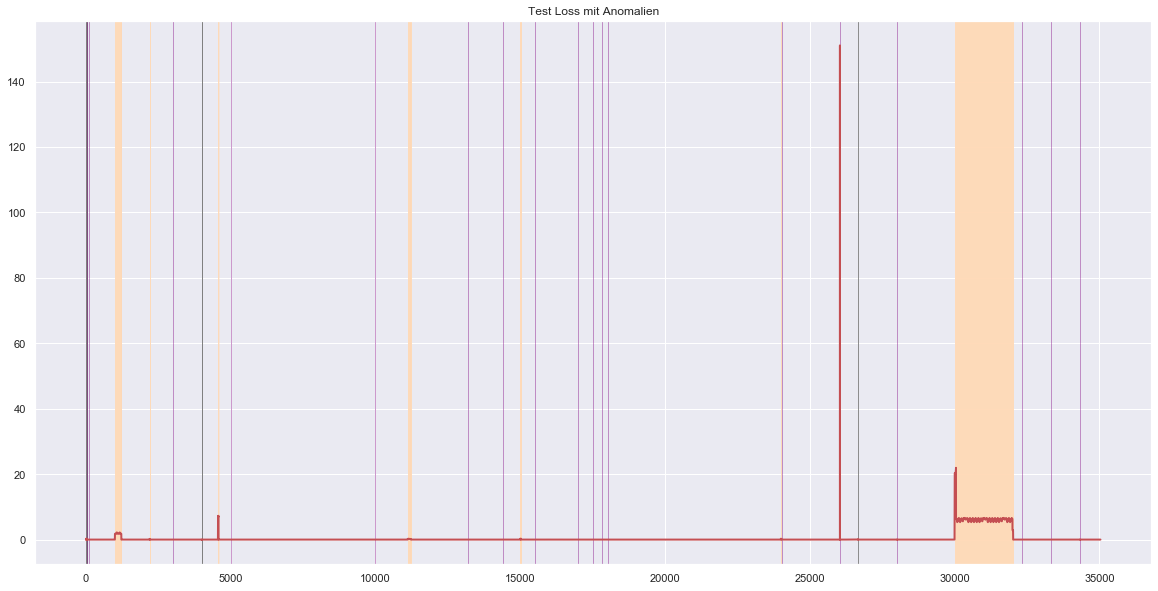

In [20]:
fig = plt.figure(figsize=(20, 10))

for val in idx_anomalies:
    if idx_anomalies[val] == 1.0:
        color = 'purple'
    elif idx_anomalies[val] == 2.0:
        color = 'peachpuff'
    elif idx_anomalies[val] == 3.0:
        color = 'grey'
        
    plt.axvline(val,linewidth=0.5, color=color, alpha=0.8)   

plt.plot(np.arange(len(s_losses_anormal)),s_losses_anormal,lw=2.0, color='r')

plt.title('Test Loss mit Anomalien', fontsize=15)